# Data Exploration for weather.csv

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the weather.csv file
weather = pd.read_csv('weather.csv')

In [4]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [5]:
# Count the number of missing values in each column
weather.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [6]:
weather.shape

(3665, 24)

#### For some of the columns, there seems to be a lot of null values, especially for events. Apart from that, there are certain dates for which there are small number of NaN values.

In [7]:
weather.events

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3660    NaN
3661    NaN
3662    NaN
3663    NaN
3664    NaN
Name: events, Length: 3665, dtype: object

In [8]:
# Show events column from weather where value not NaN
weather.events[weather.events.notnull()]

14       Fog
23      Rain
32       Fog
44       Fog
52       Fog
        ... 
3555    Rain
3582    Rain
3621    Rain
3633    Rain
3639    Rain
Name: events, Length: 522, dtype: object

In [9]:
# Unique elements for events column
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

For the NaN values in the events column, it was initially assumed that there were numerous Null values. However, it appears that NaN values simply indicate a normal day without any specific weather event. Therefore, to simplify interpretation, all NaN values will be replaced with 'clear_day', indicating a clear or normal day.

In [10]:
# Replace weather events NaN with 'clear_day'
weather.events.fillna('clear-day', inplace=True)

In [11]:
weather.events

0       clear-day
1       clear-day
2       clear-day
3       clear-day
4       clear-day
          ...    
3660    clear-day
3661    clear-day
3662    clear-day
3663    clear-day
3664    clear-day
Name: events, Length: 3665, dtype: object

In [12]:
# Convert all values in the 'events' column to lowercase
weather['events'] = weather['events'].str.lower()

In [13]:
# Get unique elements for events column
weather.events.unique()

array(['clear-day', 'fog', 'rain', 'fog-rain', 'rain-thunderstorm'],
      dtype=object)

##### Now, the events column seeems to be more friendly to work on.

In [14]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,clear-day,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,clear-day,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,clear-day,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,clear-day,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,clear-day,277.0,94107


##### We will now check the 'zip_code' column

In [15]:
# Show the uniuqe elements for the zip_code column
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

##### There only seems to be 5 unique zip codes, which means that the dataset is only for these mentioned zip codes. We can possibly use these zip codes for demand analysis and prediction

In [16]:
# Get the distribution of the weather with respect to the zip_code
weather.zip_code.value_counts()


zip_code
94107    733
94063    733
94301    733
94041    733
95113    733
Name: count, dtype: int64

#### There seems to be equal numbers of data for each zip code.

In [17]:
# Count null data for each column with respect to the zip_code
weather.groupby('zip_code')


In [18]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,clear-day,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,clear-day,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,clear-day,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,clear-day,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,clear-day,277.0,94107


In [19]:
# For each unique zip_code, get the count of null values for each column
weather.groupby('zip_code').apply(lambda x: x.isnull().sum())


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
zip_code,,,,,,,,,,,,,,,,,,,,,
94041,0,3,3,3,3,3,3,3,3,3,...,0,0,0,0,9,0,0,0,0,0
94063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,412,0,0,0,0,0
94107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,0,0,0
94301,0,1,1,1,51,51,51,51,51,51,...,13,13,1,1,453,1,1,0,1,0
95113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,0,0,0,0,0


<Axes: xlabel='zip_code'>

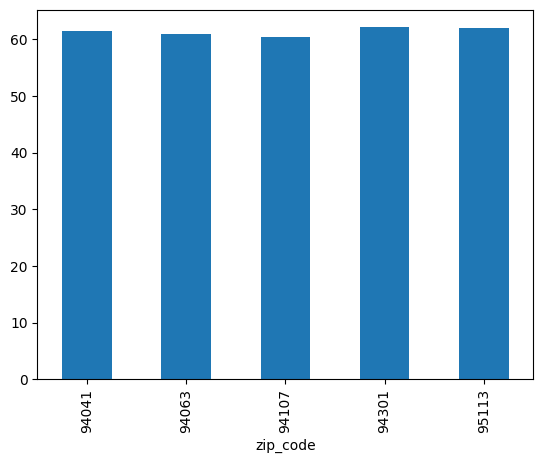

In [20]:
# Plot mean_temperature_f for each zip_code
weather.groupby('zip_code').mean_temperature_f.mean().plot(kind='bar')

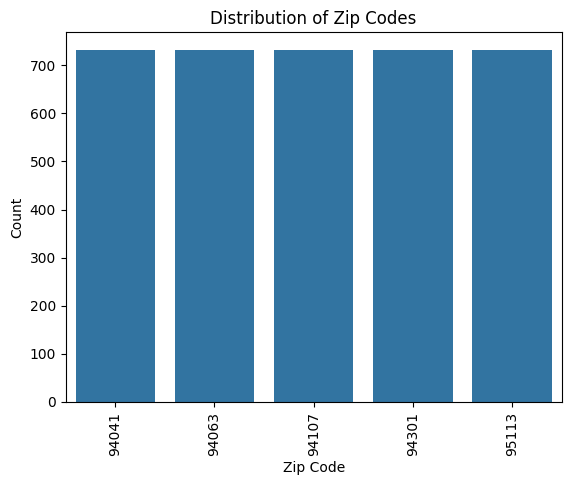

In [21]:
zip_code_counts = weather['zip_code'].value_counts()
sb.barplot(x=zip_code_counts.index, y=zip_code_counts.values)

# Improve the readability of the plot
plt.xticks(rotation=90)  # Rotate the x labels to prevent overlap
plt.xlabel('Zip Code')  # Label for the x-axis
plt.ylabel('Count')     # Label for the y-axis
plt.title('Distribution of Zip Codes')  # Title of the plot

# Finally, show the plot
plt.show()

In [22]:
# Print unique events
weather.events.unique()

array(['clear-day', 'fog', 'rain', 'fog-rain', 'rain-thunderstorm'],
      dtype=object)

<Axes: xlabel='count', ylabel='events'>

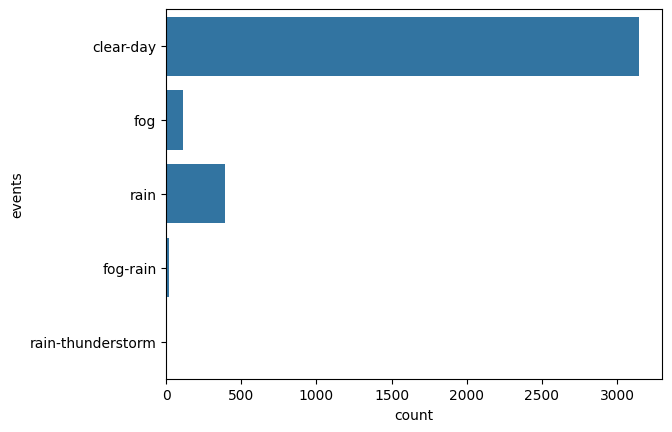

In [23]:
# Plot the distribution of events
sb.countplot(weather.events)

In [24]:
weather['events'].value_counts()

events
clear-day            3143
rain                  390
fog                   112
fog-rain               17
rain-thunderstorm       3
Name: count, dtype: int64

In [25]:
filtered_weather = weather[weather['events'] != 'rain-thunderstorm']
filtered_weather['events']

0       clear-day
1       clear-day
2       clear-day
3       clear-day
4       clear-day
          ...    
3660    clear-day
3661    clear-day
3662    clear-day
3663    clear-day
3664    clear-day
Name: events, Length: 3662, dtype: object

In [27]:
filtered_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3662 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            3662 non-null   object 
 1   max_temperature_f               3658 non-null   float64
 2   mean_temperature_f              3658 non-null   float64
 3   min_temperature_f               3658 non-null   float64
 4   max_dew_point_f                 3609 non-null   float64
 5   mean_dew_point_f                3609 non-null   float64
 6   min_dew_point_f                 3609 non-null   float64
 7   max_humidity                    3609 non-null   float64
 8   mean_humidity                   3609 non-null   float64
 9   min_humidity                    3609 non-null   float64
 10  max_sea_level_pressure_inches   3661 non-null   float64
 11  mean_sea_level_pressure_inches  3661 non-null   float64
 12  min_sea_level_pressure_inches   3661 no

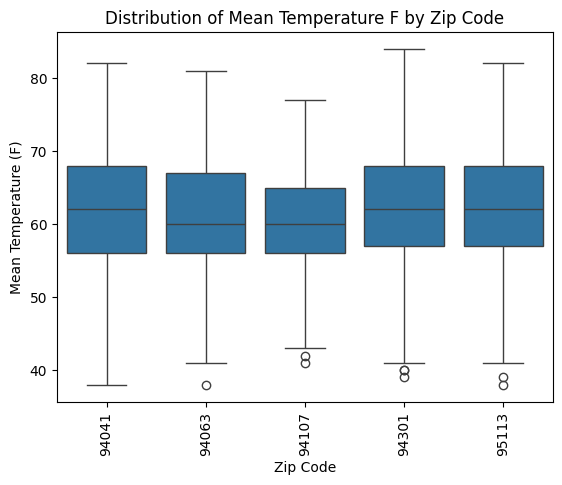

In [28]:
sb.boxplot(x='zip_code', y='mean_temperature_f', data=filtered_weather)

# Improve the readability of the plot
plt.xticks(rotation=90)  # Rotate the x labels to prevent overlap
plt.xlabel('Zip Code')  # Label for the x-axis
plt.ylabel('Mean Temperature (F)')  # Label for the y-axis
plt.title('Distribution of Mean Temperature F by Zip Code')  # Title of the plot

# Display the plot
plt.show()

In [29]:
# Check for null values in the weather dataframe
filtered_weather.isnull().sum()

date                                0
max_temperature_f                   4
mean_temperature_f                  4
min_temperature_f                   4
max_dew_point_f                    53
mean_dew_point_f                   53
min_dew_point_f                    53
max_humidity                       53
mean_humidity                      53
min_humidity                       53
max_sea_level_pressure_inches       1
mean_sea_level_pressure_inches      1
min_sea_level_pressure_inches       1
max_visibility_miles               13
mean_visibility_miles              13
min_visibility_miles               13
max_wind_Speed_mph                  1
mean_wind_speed_mph                 1
max_gust_speed_mph                898
precipitation_inches                1
cloud_cover                         1
events                              0
wind_dir_degrees                    1
zip_code                            0
dtype: int64

#### We see that there seem to be null values for 'precipitation_inches'. Assuming that this is a type conversion loss, we need to handle that.

In [30]:
# Replace the null values in the precipitation column with 0.0
filtered_weather.loc[filtered_weather.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

In [31]:
# Calculate the mean of each column and fill null values with these means
filtered_weather['max_temperature_f'] = filtered_weather['max_temperature_f'].fillna(filtered_weather['max_temperature_f'].mean())
filtered_weather['mean_temperature_f'] = filtered_weather['mean_temperature_f'].fillna(filtered_weather['mean_temperature_f'].mean())
filtered_weather['min_temperature_f'] = filtered_weather['min_temperature_f'].fillna(filtered_weather['min_temperature_f'].mean())

<ipython-input-31-f0524f8b5aeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather['max_temperature_f'] = filtered_weather['max_temperature_f'].fillna(filtered_weather['max_temperature_f'].mean())
<ipython-input-31-f0524f8b5aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather['mean_temperature_f'] = filtered_weather['mean_temperature_f'].fillna(filtered_weather['mean_temperature_f'].mean())
<ipython-input-31-f0524f8b5aeb>:4: SettingWithCopyWarning: 
A value is trying to be s

In [32]:
# Check for null values in the weather dataframe
filtered_weather.isnull().sum()

date                                0
max_temperature_f                   0
mean_temperature_f                  0
min_temperature_f                   0
max_dew_point_f                    53
mean_dew_point_f                   53
min_dew_point_f                    53
max_humidity                       53
mean_humidity                      53
min_humidity                       53
max_sea_level_pressure_inches       1
mean_sea_level_pressure_inches      1
min_sea_level_pressure_inches       1
max_visibility_miles               13
mean_visibility_miles              13
min_visibility_miles               13
max_wind_Speed_mph                  1
mean_wind_speed_mph                 1
max_gust_speed_mph                898
precipitation_inches                0
cloud_cover                         1
events                              0
wind_dir_degrees                    1
zip_code                            0
dtype: int64

In [33]:
# Calculate the mean of each column and fill null values with these means
filtered_weather['max_dew_point_f'] = filtered_weather['max_dew_point_f'].fillna(filtered_weather['max_dew_point_f'].mean())
filtered_weather['mean_dew_point_f'] = filtered_weather['mean_dew_point_f'].fillna(filtered_weather['mean_dew_point_f'].mean())
filtered_weather['min_dew_point_f'] = filtered_weather['min_dew_point_f'].fillna(filtered_weather['min_dew_point_f'].mean())

filtered_weather['max_humidity'] = filtered_weather['max_humidity'].fillna(filtered_weather['max_humidity'].mean())
filtered_weather['mean_humidity'] = filtered_weather['mean_humidity'].fillna(filtered_weather['mean_humidity'].mean())
filtered_weather['min_humidity'] = filtered_weather['min_humidity'].fillna(filtered_weather['min_humidity'].mean())

filtered_weather['max_visibility_miles'] = filtered_weather['max_visibility_miles'].fillna(filtered_weather['max_visibility_miles'].mean())
filtered_weather['mean_visibility_miles'] = filtered_weather['mean_visibility_miles'].fillna(filtered_weather['mean_visibility_miles'].mean())
filtered_weather['min_visibility_miles'] = filtered_weather['min_visibility_miles'].fillna(filtered_weather['min_visibility_miles'].mean())

filtered_weather['max_gust_speed_mph'] = filtered_weather['max_gust_speed_mph'].fillna(filtered_weather['max_gust_speed_mph'].mean())

<ipython-input-33-af0652428f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather['max_dew_point_f'] = filtered_weather['max_dew_point_f'].fillna(filtered_weather['max_dew_point_f'].mean())
<ipython-input-33-af0652428f78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather['mean_dew_point_f'] = filtered_weather['mean_dew_point_f'].fillna(filtered_weather['mean_dew_point_f'].mean())
<ipython-input-33-af0652428f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [34]:
filtered_weather.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     1
mean_sea_level_pressure_inches    1
min_sea_level_pressure_inches     1
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                1
mean_wind_speed_mph               1
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       1
events                            0
wind_dir_degrees                  1
zip_code                          0
dtype: int64

In [35]:
# Drop rows with null values only in the 'events' column
filtered_weather.dropna(subset=['max_sea_level_pressure_inches'], inplace=True)
filtered_weather.dropna(subset=['mean_sea_level_pressure_inches'], inplace=True)
filtered_weather.dropna(subset=['min_sea_level_pressure_inches'], inplace=True)
filtered_weather.dropna(subset=['max_wind_Speed_mph'], inplace=True)
filtered_weather.dropna(subset=['mean_wind_speed_mph'], inplace=True)
filtered_weather.dropna(subset=['cloud_cover'], inplace=True)
filtered_weather.dropna(subset=['wind_dir_degrees'], inplace=True)

<ipython-input-35-f76636180c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather.dropna(subset=['max_sea_level_pressure_inches'], inplace=True)
<ipython-input-35-f76636180c9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather.dropna(subset=['mean_sea_level_pressure_inches'], inplace=True)
<ipython-input-35-f76636180c9e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather.dropna(subset=['mi

In [36]:
filtered_weather.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [37]:
# Get datatype for weather
filtered_weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

##### We see that all the datatypes are workable, except for precepication_inches. We need to handle that

In [38]:
# Change the datatype of the precipitation column to numpy float
filtered_weather.precipitation_inches = pd.to_numeric(filtered_weather.precipitation_inches, errors = 'coerce')

<ipython-input-38-829ecb0bac21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_weather.precipitation_inches = pd.to_numeric(filtered_weather.precipitation_inches, errors = 'coerce')


In [39]:
# Get datatype for weather
filtered_weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

Now that we have the data, we can create separate sets for all zip codes so that we can predict the trips for each of them individually.

##### Quick google search tells us:

Zip Code----------------------------City

94107 ------------------------------ SF<br>
94063 ------------------------------ SM (Redwood)<br>
94301 ------------------------------ SC<br>
94041 ------------------------------ MW<br>
95113 ------------------------------ SJ<br>


In [40]:
# Extract data where zip_code is 94107
weather_94107_SF = filtered_weather[filtered_weather.zip_code == 94107]

# Extract data where zip_code is 94063
weather_94063_Redwood = filtered_weather[filtered_weather.zip_code == 94063]

# Extract data where zip_code is 94301
weather_94301_PaloAlto = filtered_weather[filtered_weather.zip_code == 94301]

# Extract data where zip_code is 95014
weather_94041_MountainView = filtered_weather[filtered_weather.zip_code == 94041]

# Extract data where zip_code is 95113
weather_95113_SanJose = filtered_weather[filtered_weather.zip_code == 95113]

In [41]:
# Drop zip_code column from all the dataframes
weather_94107_SF.drop(['zip_code'], axis=1)
weather_94063_Redwood.drop(['zip_code'], axis=1)
weather_94301_PaloAlto.drop(['zip_code'], axis=1)
weather_94041_MountainView.drop(['zip_code'], axis=1)
weather_95113_SanJose.drop(['zip_code'], axis=1)


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
736,8/29/2013,81.0,72.0,63.0,62.0,61.0,59.0,87.0,69.0,51.0,...,10.0,10.0,10.0,16.0,7.0,24.0,0.0,4.0,clear-day,320.0
737,8/30/2013,88.0,76.0,63.0,63.0,60.0,55.0,93.0,65.0,37.0,...,10.0,10.0,10.0,18.0,5.0,22.0,0.0,2.0,clear-day,316.0
738,8/31/2013,80.0,71.0,62.0,59.0,57.0,54.0,90.0,66.0,42.0,...,10.0,10.0,10.0,18.0,8.0,22.0,0.0,0.0,clear-day,309.0
739,9/1/2013,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,10.0,10.0,10.0,20.0,7.0,24.0,0.0,2.0,clear-day,308.0
740,9/2/2013,79.0,73.0,66.0,62.0,61.0,59.0,81.0,68.0,54.0,...,10.0,10.0,10.0,21.0,8.0,25.0,NaN,5.0,rain,315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,8/27/2015,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,10.0,23.0,6.0,29.0,0.0,3.0,clear-day,313.0
3661,8/28/2015,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,10.0,25.0,7.0,30.0,0.0,3.0,clear-day,307.0
3662,8/29/2015,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,10.0,21.0,9.0,26.0,0.0,4.0,clear-day,312.0
3663,8/30/2015,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,10.0,22.0,10.0,29.0,0.0,3.0,clear-day,291.0


In [42]:
# Get the count of null values in all
weather_94107_SF.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                 0
precipitation_inches              69
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

In [43]:
# Replace the null values in the precipitation column with 0.0
weather_94107_SF.loc[weather_94107_SF.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

In [44]:
# Get the count of null values in all
weather_94107_SF.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [45]:
# Get the count of null values in all
weather_94063_Redwood.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [46]:
# Get the count of null values in all
weather_94301_PaloAlto.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              4
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [47]:
# Get the count of null values in all
weather_94041_MountainView.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                 0
precipitation_inches              30
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

In [48]:
# Replace the null values in the precipitation column with 0.0
weather_94301_PaloAlto.loc[weather_94301_PaloAlto.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0
weather_94041_MountainView.loc[weather_94041_MountainView.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

In [49]:
# Get the count of null values in all
weather_94041_MountainView.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [50]:
# Get the count of null values in all
weather_95113_SanJose.isnull().sum()

date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                 0
precipitation_inches              39
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
dtype: int64

In [51]:
# Replace the null values in the precipitation column with 0.0
weather_95113_SanJose.loc[weather_95113_SanJose.precipitation_inches.isnull(), 'precipitation_inches'] = 0.0

In [52]:
# Get the count of null values in all
weather_95113_SanJose.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [53]:
# Sort each dataframe by date
weather_94107_SF = weather_94107_SF.sort_values(by='date')
weather_94063_Redwood = weather_94063_Redwood.sort_values(by='date')
weather_94301_PaloAlto = weather_94301_PaloAlto.sort_values(by='date')
weather_94041_MountainView = weather_94041_MountainView.sort_values(by='date')
weather_95113_SanJose = weather_95113_SanJose.sort_values(by='date')

In [54]:
weather_94107_SF.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
125,1/1/2014,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear-day,290.0,94107
1962,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear-day,40.0,94107
134,1/10/2014,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear-day,310.0,94107
1971,1/10/2015,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
135,1/11/2014,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear-day,281.0,94107


In [55]:
# Reset head of each dataframe
weather_94107_SF.reset_index(drop=True, inplace=True)
weather_94063_Redwood.reset_index(drop=True, inplace=True)
weather_94301_PaloAlto.reset_index(drop=True, inplace=True)
weather_94041_MountainView.reset_index(drop=True, inplace=True)
weather_95113_SanJose.reset_index(drop=True, inplace=True)

In [56]:
# Get the head of each dataframe
weather_94107_SF.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,1/1/2014,56.0,49.0,41.0,45.0,40.0,36.0,83.0,69.0,55.0,...,9.0,7.0,9.0,1.0,10.0,0.0,3.0,clear-day,290.0,94107
1,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,...,10.0,10.0,23.0,8.0,28.0,0.0,1.0,clear-day,40.0,94107
2,1/10/2014,60.0,54.0,48.0,48.0,46.0,43.0,89.0,75.0,60.0,...,9.0,6.0,15.0,6.0,17.0,0.0,4.0,clear-day,310.0,94107
3,1/10/2015,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,7.0,4.0,8.0,3.0,10.0,0.0,6.0,fog,280.0,94107
4,1/11/2014,58.0,52.0,46.0,51.0,46.0,42.0,93.0,83.0,72.0,...,10.0,6.0,18.0,6.0,22.0,0.0,4.0,clear-day,281.0,94107


#### Now that we have our data, we can save it to files for use

In [57]:
# Save each dataframe to a csv file
weather_94107_SF.to_csv('/content/weather_94107_SF.csv', index=False)
weather_94063_Redwood.to_csv('/content/weather_94063_Redwood.csv', index=False)
weather_94301_PaloAlto.to_csv('/content/weather_94301_PaloAlto.csv', index=False)
weather_94041_MountainView.to_csv('/content/weather_94041_MountainView.csv', index=False)
weather_95113_SanJose.to_csv('/content/weather_95113_SanJose.csv', index=False)
